#  14章 離散時間システムの制御 

In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams['font.family'] ='sans-serif' #使用するフォント
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'cm' # math fontの設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 0.5 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['mathtext.default'] = 'it'#'regular'
plt.rcParams['axes.xmargin'] = '0'
plt.rcParams['axes.ymargin'] = '0.05'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'

plt.rcParams["legend.fancybox"] = True     # 丸角
# plt.rcParams["legend.framealpha"] = 1    # 透明度の指定、0で塗りつぶしなし
# plt.rcParams["legend.edgecolor"] = 'gray' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1.8  # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.4  # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.7 # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1.0   # 点がある場合のmarker scale

In [2]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [3]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':', lw=0.5)
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [4]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':', lw=0.5)
    fig_ax[0].set_ylabel('Gain [dB]')

    fig_ax[1].grid(which="both", ls=':', lw=0.5)
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

## 離散化

### 例題14.3

In [114]:
P = tf(1, [1,1])
Pd = c2d(P, 1, method='tustin')
Pd

TransferFunction(array([0.33333333, 0.33333333]), array([ 1.        , -0.33333333]), 1)

In [116]:
Pss = ss(P)
Pss

StateSpace(array([[-1.]]), array([[1.]]), array([[1.]]), array([[0.]]))

In [118]:
Pssd = c2d(Pss, 1, method='tustin')
Pssd

StateSpace(array([[0.33333333]]), array([[0.66666667]]), array([[0.66666667]]), array([[0.33333333]]), 1)

In [123]:
Pssd2 = ss(1/3, 1/3, 4/3, 1/3, 1)
P2 = tf(Pssd2)
P2

TransferFunction(array([0.33333333, 0.33333333]), array([ 1.        , -0.33333333]), 1)

### ゼロ次ホールドと双一次変換

In [5]:
P = tf([0, 1], [1, 1])
print('連続時間システム',P)

連続時間システム 
  1
-----
s + 1



In [6]:
ts = 0.2

Pd1 = c2d(P, ts, method='zoh')
print('離散時間システム（zoh）', Pd1)

Pd2 = c2d(P, ts, method='tustin')
print('離散時間システム（tustin）',Pd2)

離散時間システム（zoh） 
  0.1813
----------
z - 0.8187

dt = 0.2

離散時間システム（tustin） 
0.09091 z + 0.09091
-------------------
    z - 0.8182

dt = 0.2



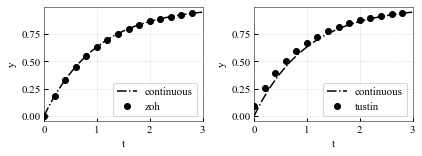

In [7]:
fig, ax = plt.subplots(1,2, figsize=(6, 2.3))

Tc = np.arange(0, 3, 0.01)
y, t = step(P, Tc)
ax[0].plot(t, y, ls='-.', label='continuous', color='k')
ax[1].plot(t, y, ls='-.', label='continuous', color='k')


Td = np.arange(0, 3, ts)
y, t = step(Pd1, Td)
ax[0].plot(t, y, ls='', marker='o', label='zoh', color='k')

y, t = step(Pd2, Td)
ax[1].plot(t, y, ls='', marker='o', label='tustin', color='k')

for i in [0, 1]:
    plot_set(ax[i], 't', 'y', 'best')
    ax[i].set_xlim([0, 3])

fig.tight_layout()
# fig.savefig("c2d_step.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


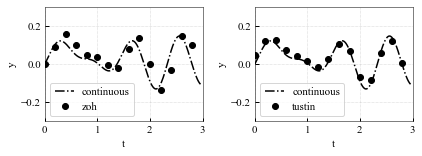

In [8]:
fig, ax = plt.subplots(1,2, figsize=(6, 2.3))

Tc = np.arange(0, 3, 0.01)
Uc = 0.5 * np.sin(6*Tc) + 0.5 * np.cos(8*Tc)

y, t, x0 = lsim(P, Uc, Tc)
ax[0].plot(t, y, ls='-.', label='continuous', color='k')
ax[1].plot(t, y, ls='-.', label='continuous', color='k')


T = np.arange(0, 3, ts)
U = 0.5 * np.sin(6*T) + 0.5 * np.cos(8*T)

y, t, x0 = lsim(Pd1, U, T)
ax[0].plot(t, y, ls='', marker='o', label='zoh', color='k')

y, t, x0 = lsim(Pd2, U, T)
ax[1].plot(t, y, ls='', marker='o', label='tustin', color='k')

for i in [0, 1]:
    plot_set(ax[i], 't', 'y', 'best')
    ax[i].set_xlim([0, 3])
    ax[i].set_ylim([-0.3, 0.3])

fig.tight_layout()
# fig.savefig("c2d_time.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## 状態フィードバック

### 例14.4

In [9]:
ts = 0.1
A = [[0.9, 1], [0, 1.1]]
B = [[0],[1]]
C = np.eye(2)
D = np.zeros([2,1])
P = ss(A,B,C,D, ts)
print(P)

A = [[0.9 1. ]
     [0.  1.1]]

B = [[0.]
     [1.]]

C = [[1. 0.]
     [0. 1.]]

D = [[0.]
     [0.]]

dt = 0.1



In [10]:
pole = [0.7, 0.8]
F = - acker(P.A, P.B, pole)
F

matrix([[-0.02, -0.5 ]])

In [11]:
G = ss(P.A+P.B*F, P.B, P.C, P.D, ts)
print(G.pole())

[0.8 0.7]


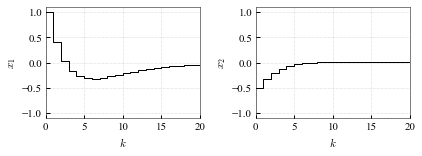

In [12]:
fig, ax = plt.subplots(1,2, figsize=(6, 2.3))

Td = np.arange(0, 2.1, ts)
y, t = initial(G, Td, [1, -0.5])
ax[0].step(t/ts, y[:,0], where='post', ls='-', lw=1, color='k')

ax[1].step(t/ts, y[:,1], where='post', ls='-', lw=1, color='k')

plot_set(ax[0], '$k$', '$x_1$')
ax[0].set_xlim([0, 2/ts])
ax[0].set_ylim([-1.1, 1.1])
plot_set(ax[1], '$k$', '$x_2$')
ax[1].set_xlim([0, 2/ts])
ax[1].set_ylim([-1.1, 1.1])

fig.tight_layout()
#fig.savefig("disc_pole_response.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## 最適レギュレータ

### 例14.5

In [13]:
Q = np.matrix([[1,0],[0,1]])
R = 0.1
X, E, F = dare(P.A, P.B, Q, R)
F

matrix([[0.44896593, 1.56029484]])

In [14]:
E

array([0.33661977+0.j, 0.1030854 +0.j])

In [18]:
X

matrix([[2.23644233, 1.42321107],
        [1.42321107, 2.75297806]])

In [15]:
FF = -np.linalg.inv(R+P.B.T*X*P.B)*(P.B.T*X*P.A)
FF

matrix([[-0.44896593, -1.56029484]])

In [16]:
G = ss(P.A-P.B*F, P.B, P.C, P.D, ts)
print(G.pole())

[0.33661977 0.1030854 ]


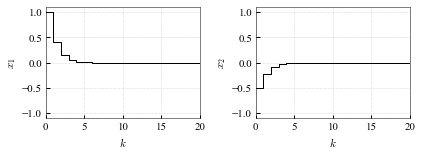

In [17]:
fig, ax = plt.subplots(1,2, figsize=(6, 2.3))

Td = np.arange(0, 2.1, ts)
y, t = initial(G, Td, [1, -0.5])
ax[0].step(t/ts, y[:,0], where='post', ls='-', lw=1, color='k')

ax[1].step(t/ts, y[:,1], where='post', ls='-', lw=1, color='k')

plot_set(ax[0], '$k$', '$x_1$')
ax[0].set_xlim([0, 2/ts])
ax[0].set_ylim([-1.1, 1.1])
plot_set(ax[1], '$k$', '$x_2$')
ax[1].set_xlim([0, 2/ts])
ax[1].set_ylim([-1.1, 1.1])

fig.tight_layout()
#fig.savefig("disc_lqr_response.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## 章末問題

### 章末問題7

In [33]:
ts = 0.1
A = [[0.5, 1], [0, 1]]
B = [[0],[1]]
C = np.eye(2)
D = np.zeros([2,1])
P = ss(A,B,C,D, ts)
print(P)

A = [[0.5 1. ]
     [0.  1. ]]

B = [[0.]
     [1.]]

C = [[1. 0.]
     [0. 1.]]

D = [[0.]
     [0.]]

dt = 0.1



In [34]:
P.pole()

array([0.5, 1. ])

In [35]:
Vc = ctrb(P.A, P.B)
Vc

matrix([[0., 1.],
        [1., 1.]])

In [37]:
regulator_pole = [0,0]
F = -acker(P.A, P.B, regulator_pole)
F

matrix([[-0.25, -1.5 ]])

### 章末問題8

In [19]:
ts = 0.1
A = [[1, 1], [0, -1]]
B = [[0],[1]]
C = np.eye(2)
D = np.zeros([2,1])
P = ss(A,B,C,D, ts)
print(P)

A = [[ 1.  1.]
     [ 0. -1.]]

B = [[0.]
     [1.]]

C = [[1. 0.]
     [0. 1.]]

D = [[0.]
     [0.]]

dt = 0.1



In [20]:
Q = np.matrix([[0.5,0],[0,0]])
R = 1

In [21]:
X, E, F = dare(P.A, P.B, Q, R)

In [22]:
X

matrix([[2., 1.],
        [1., 1.]])

In [23]:
E

array([ 0.70710678+0.j, -0.70710678+0.j])

In [24]:
G = ss(P.A-P.B*F, P.B, P.C, P.D, ts)
print(G.pole())

[ 0.70710678 -0.70710678]


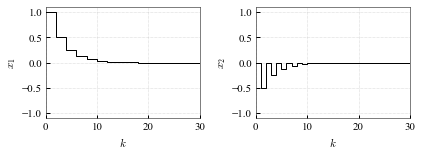

In [25]:
fig, ax = plt.subplots(1,2, figsize=(6, 2.3))

Td = np.arange(0, 3.1, ts)
y, t = initial(G, Td, [1, 0])
ax[0].step(t/ts, y[:,0], where='post', ls='-', lw=1, color='k')

ax[1].step(t/ts, y[:,1], where='post', ls='-', lw=1, color='k')

plot_set(ax[0], '$k$', '$x_1$')
ax[0].set_xlim([0, 3/ts])
ax[0].set_ylim([-1.1, 1.1])
plot_set(ax[1], '$k$', '$x_2$')
ax[1].set_xlim([0, 3/ts])
ax[1].set_ylim([-1.1, 1.1])

fig.tight_layout()

## 付録

In [26]:
A = [[1,1,0],[1,0,1],[2,1,2]]
B = [[1],[0],[1]]
C = np.eye(3)
D = np.zeros([3,1])

ts = 0.1

P = ss(A,B,C,D)

In [27]:
Q = np.eye(3)
R = 100
X, E, F = dare(P.A, P.B, Q, R)

In [28]:
X

matrix([[269.91859465, 153.35336484, 177.00773162],
        [153.35336484,  89.13772697, 100.33774379],
        [177.00773162, 100.33774379, 119.07469571]])

In [29]:
G = ss(P.A-P.B*F, P.B, P.C, P.D, ts)
print(G.pole())

[-0.52918501  0.64442964  0.34784429]


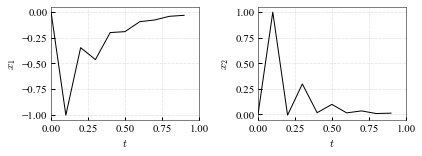

In [32]:
fig, ax = plt.subplots(1,2, figsize=(6, 2.3))

Td = np.arange(0, 1, ts)
y, t = initial(G, Td, [0,0,1])
# ax[0].step(t, y[:,0], where='post', ls='-', lw=1, color='k')
ax[0].plot(t, y[:,0], ls='-', lw=1, color='k')

# ax[1].step(t, y[:,1], where='post', ls='-', lw=1, color='k')
ax[1].plot(t, y[:,1], ls='-', lw=1, color='k')

plot_set(ax[0], '$t$', '$x_1$')
ax[0].set_xlim([0, 1])
plot_set(ax[1], '$t$', '$x_2$')
ax[1].set_xlim([0, 1])

fig.tight_layout()